In [19]:
import pandas as pd
titanic=pd.read_csv("C:\\Users\\LCL\\Desktop\\sklearn_tensorflow\\kaggle\\Projects\\Titanic\\train.csv")
test=pd.read_csv("C:\\Users\\LCL\\Desktop\\sklearn_tensorflow\\kaggle\\Projects\\Titanic\\test.csv")
label=titanic["Survived"]
#查看数据缺失值
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


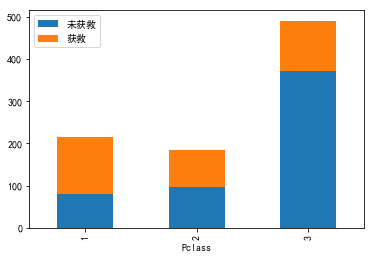

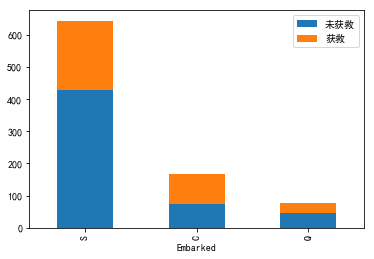

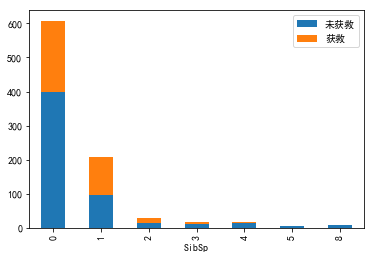

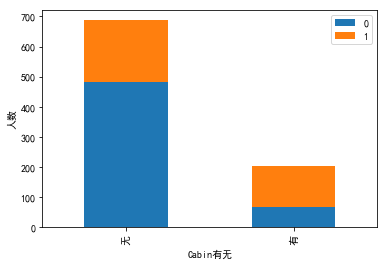

In [20]:
#查看各属性与结果关系
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(1)
Survived_0 = titanic.Pclass[titanic.Survived == 0].value_counts() #Pclass是船舱等级，改变这个属性可得到其他属性与Survived的关系
Survived_1 = titanic.Pclass[titanic.Survived == 1].value_counts()
df=pd.DataFrame({'获救':Survived_1, '未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.xlabel("Pclass")
plt.show()

plt.figure(2)
Survived_0 = titanic.Embarked[titanic.Survived == 0].value_counts() #改为Embarked，检查港口位置与Survived的关系
Survived_1 = titanic.Embarked[titanic.Survived == 1].value_counts()
df=pd.DataFrame({'获救':Survived_1, '未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.xlabel("Embarked")
plt.show()

plt.figure(3)
Survived_0 = titanic.SibSp[titanic.Survived == 0].value_counts()
Survived_1 = titanic.SibSp[titanic.Survived == 1].value_counts()
df=pd.DataFrame({'获救':Survived_1, '未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.xlabel("SibSp")
plt.show()

plt.figure(4)
Survived_cabin = titanic.Survived[pd.notnull(titanic.Cabin)].value_counts()
Survived_nocabin = titanic.Survived[pd.isnull(titanic.Cabin)].value_counts()
df=pd.DataFrame({'有':Survived_cabin, '无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.xlabel("Cabin有无") 
plt.ylabel("人数")
plt.show()

In [21]:
#处理Age属性缺失值

#从Name属性中获取Title
titanic['Title']=titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())  
test['Title']=test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

#将Title为Miss的一部分样本的Title改为Girl
t1=titanic.loc[titanic.Age.notnull()]
t2=t1.loc[t1.Title=="Miss"]
t3=t2.loc[t2.Age<=14]
for i in range(len(titanic)):
    if titanic.PassengerId[i] in t3.PassengerId.values:
        titanic.Title[i]="Girl"

t1=titanic.loc[titanic.Age.isnull()]
t2=t1.loc[t1.Title=="Miss"]
t3=t2.loc[t2.Parch!=0]
for i in range(len(titanic)):
    if titanic.PassengerId[i] in t3.PassengerId.values:
        titanic.Title[i]="Girl"

#对测试集进行同样的处理
t1=test.loc[test.Age.notnull()]
t2=t1.loc[t1.Title=="Miss"]
t3=t2.loc[t2.Age<=14]
for i in range(len(test)):
    if test.PassengerId[i] in t3.PassengerId.values:
        test.Title[i]="Girl"

t1=test.loc[test.Age.isnull()]
t2=t1.loc[t1.Title=="Miss"]
t3=t2.loc[t2.Parch!=0]
for i in range(len(test)):
    if test.PassengerId[i] in t3.PassengerId.values:
        test.Title[i]="Girl"
        
#根据Title中位数补充缺失值
Tit=['Mr','Miss','Mrs','Master','Girl',"Dr","Rev"]
for i in Tit:
    t1=titanic.loc[titanic.Age.isnull()]
    t2=t1.loc[titanic.Title==i]
    t3=titanic.loc[titanic.Age.notnull()]
    t4=t3.loc[titanic.Title==i]
    t5=test.loc[test.Age.isnull()]
    t6=t5.loc[test.Title==i]
    for i in range(len(titanic)):
        if titanic.PassengerId[i] in t2.PassengerId.values:
            titanic.Age[i]=t4["Age"].median()
    for i in range(len(test)):
        if test.PassengerId[i] in t6.PassengerId.values:
            test.Age[i]=t4["Age"].median()
            
#补充未被涉及到的Age
from sklearn.preprocessing import Imputer
imputer=Imputer()
imputer.fit(test[["Age"]])
test.loc[(test.Age.isnull()), 'Age']=imputer.statistics_[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [22]:
#将Cabin转换为0/1属性

def set_Cabin_type(df):
    #使用df.loc[ (df.Cabin.notnull()), 'Cabin' ]找出相应样本的相应属性，进行修改
    #df.loc[(df.Cabin.notnull()), 'Cabin']返回一个Series
    #age_df[age_df.Age.notnull()]返回一个dataframe
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = 1
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = 0
    return df

titanic = set_Cabin_type(titanic)
test = set_Cabin_type(test)

In [24]:
#将Sex转换为数值属性
titanic.loc[titanic.Sex=="male","Sex"]=1
titanic.loc[titanic.Sex=="female","Sex"]=0
test.loc[test.Sex=="male","Sex"]=1
test.loc[test.Sex=="female","Sex"]=0

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [25]:
#将Title转化为数值属性：Title_num
titanic["Title_num"]=2
test["Title_num"]=2
titanic.loc[titanic.Title=="Dr","Title_num"]=1
titanic.loc[titanic.Title=="Master","Title_num"]=1
titanic.loc[titanic.Title=="Girl","Title_num"]=1
titanic.loc[titanic.Title=="Mrs","Title_num"]=0
titanic.loc[titanic.Title=="Miss","Title_num"]=0
test.loc[test.Title=="Dr","Title_num"]=1
test.loc[test.Title=="Master","Title_num"]=1
test.loc[test.Title=="Girl","Title_num"]=1
test.loc[test.Title=="Mrs","Title_num"]=0
test.loc[test.Title=="Miss","Title_num"]=0

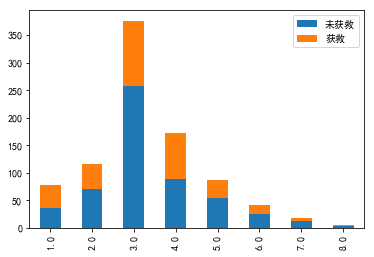

In [26]:
#观察Age与Survived关系，转化Age属性
import numpy as np
titanic["Age"]=np.ceil(titanic["Age"]/10.0)
test["Age"]=np.ceil(test["Age"]/10.0)

#发现Age属性为1或4的获救几率更高
plt.figure(1)
Survived_0 = titanic.Age[titanic.Survived == 0].value_counts()
Survived_1 = titanic.Age[titanic.Survived == 1].value_counts()
df=pd.DataFrame({'获救':Survived_1, '未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.show()

titanic.loc[titanic.Age==1.0,"Age"]=0
titanic.loc[titanic.Age==2.0,"Age"]=1
titanic.loc[titanic.Age==3.0,"Age"]=1
titanic.loc[titanic.Age==4.0,"Age"]=0
titanic.loc[titanic.Age==5.0,"Age"]=1
titanic.loc[titanic.Age==6.0,"Age"]=1
titanic.loc[titanic.Age==7.0,"Age"]=1
titanic.loc[titanic.Age==8.0,"Age"]=1
test.loc[test.Age==1.0,"Age"]=0
test.loc[test.Age==2.0,"Age"]=1
test.loc[test.Age==3.0,"Age"]=1
test.loc[test.Age==4.0,"Age"]=0
test.loc[test.Age==5.0,"Age"]=1
test.loc[test.Age==6.0,"Age"]=1
test.loc[test.Age==7.0,"Age"]=1
test.loc[test.Age==8.0,"Age"]=1

In [27]:
#构建新属性PST
titanic["PST"]=titanic["Pclass"]+titanic["Sex"]+titanic["Title_num"]+titanic["Age"]
test["PST"]=test["Pclass"]+test["Sex"]+test["Title_num"]+titanic["Age"]

In [28]:
#检查相关性矩阵，删除与结果相关度不高的特征
corr_matrix = titanic.corr()
corr_matrix["Survived"].sort_values(ascending=False)
titanic.drop(["PassengerId","SibSp","Name","Ticket","Title","Embarked","Parch","Age"],axis=1,inplace=True)
test.drop(["PassengerId","SibSp","Name","Ticket","Title","Embarked","Parch","Age"],axis=1,inplace=True)

In [30]:
#补充缺失的Fare
from sklearn.preprocessing import Imputer
imputer=Imputer()
imputer.fit(titanic[["Fare"]])
test.loc[(test.Fare.isnull()), 'Fare']=imputer.statistics_[0]

In [33]:
#自定义转换器
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names]

In [34]:
#定义流水线
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = ["Pclass","Sex","Cabin","Title_num","PST"]
std_attribs=["Fare"]


num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
    ]) 

std_pipeline = Pipeline([
        ('selector', DataFrameSelector(std_attribs)),
        ("standardscaler",StandardScaler())

    ])

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("std_pipeline", std_pipeline),
    ])

In [35]:
#使用流水线清理数据
full_pipeline.fit(titanic)
titanic_prepared = full_pipeline.transform(titanic)
test_prepared = full_pipeline.transform(test)

In [122]:
#第一个训练器：xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
from sklearn.model_selection import GridSearchCV
param_grid = {'min_child_weight':[4,5,6],'learning_rate': [0.1], 'max_depth': [4,5,6],"gamma":[0],
             "n_estimators":[200],"n_jobs":[-1],"subsample":[0.6],"colsample_bytree":[0.5]},
xgb=XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=5,scoring="accuracy")
grid_search.fit(titanic_prepared,label)
test_pred=grid_search.predict(test_prepared)
test_pred=np.array(test_pred,dtype=int)
y_df=pd.DataFrame(test_pred)
grid_search.best_score_

0.84399551066217737

In [123]:
grid_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 200,
 'n_jobs': -1,
 'subsample': 0.6}

In [152]:
#第二个训练器：RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
param_grid = {"max_features":[4,5,6],"n_estimators":[800,700,600,500],"n_jobs":[-1],"max_depth":[5,6]}
grid_search = GridSearchCV(rfc, param_grid, cv=8,scoring="accuracy")
grid_search.fit(titanic_prepared,label)
test_pred_2=grid_search.predict(test_prepared)
test_pred_2=np.array(test_pred_2,dtype=int)
y_df_2=pd.DataFrame(test_pred_2)
grid_search.best_score_

0.83501683501683499

In [153]:
grid_search.best_params_

{'max_depth': 6, 'max_features': 5, 'n_estimators': 600, 'n_jobs': -1}

In [154]:
#处理结果并保存
pred=test_pred+test_pred_2
pred=np.floor(pred/2)
y=pd.DataFrame(pred)
y.to_csv('C:\\Users\\LCL\\Desktop\\sklearn_tensorflow\\kaggle\\Projects\\Titanic\\data_pred.csv')